In [ ]:
# Step 1: Import Libraries and Load Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "D:\Project\Autism\Autism prediction\Autism_Screening_Data_Combined.csv"
data = pd.read_csv(file_path)

# Display the first few rows
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jauundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,m,no,no,NO
1,0,1,1,1,0,1,1,0,1,0,15,m,no,no,NO
2,1,1,1,0,1,1,1,1,1,1,15,f,no,yes,YES
3,1,1,1,1,1,1,1,1,0,0,16,f,no,no,YES
4,1,1,1,1,1,1,1,1,1,1,15,f,no,no,YES


In [4]:
# Step 2: Dataset Information and Exploration

# Display dataset information
data.info()

# Check for missing values
print("\nMissing Values:\n", data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6075 entries, 0 to 6074
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   A1          6075 non-null   int64 
 1   A2          6075 non-null   int64 
 2   A3          6075 non-null   int64 
 3   A4          6075 non-null   int64 
 4   A5          6075 non-null   int64 
 5   A6          6075 non-null   int64 
 6   A7          6075 non-null   int64 
 7   A8          6075 non-null   int64 
 8   A9          6075 non-null   int64 
 9   A10         6075 non-null   int64 
 10  Age         6075 non-null   int64 
 11  Sex         6075 non-null   object
 12  Jauundice   6075 non-null   object
 13  Family_ASD  6075 non-null   object
 14  Class       6075 non-null   object
dtypes: int64(11), object(4)
memory usage: 712.0+ KB

Missing Values:
 A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            

<ipython-input-5-d3bd30135953>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=data, palette='viridis')


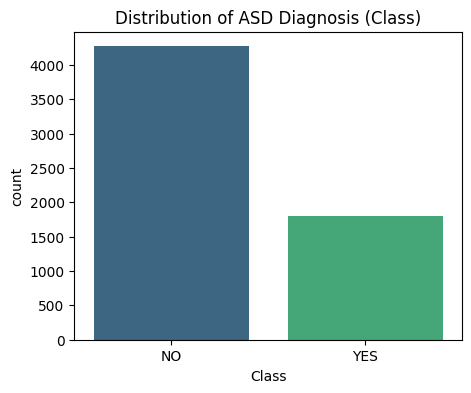

In [5]:
# Distribution of the target variable (Class)
plt.figure(figsize=(5, 4))
sns.countplot(x='Class', data=data, palette='viridis')
plt.title("Distribution of ASD Diagnosis (Class)")
plt.show()

In [6]:
# Step 3: Data Cleaning & Encoding

# Correct the spelling error in 'Jauundice'
data.rename(columns={'Jauundice': 'Jaundice'}, inplace=True)

# Encode categorical features
data['Sex'] = data['Sex'].map({'m': 0, 'f': 1})
data['Jaundice'] = data['Jaundice'].map({'no': 0, 'yes': 1})
data['Family_ASD'] = data['Family_ASD'].map({'no': 0, 'yes': 1})

# Encode target variable (Class)
data['Class'] = data['Class'].map({'NO': 0, 'YES': 1})

# Display the first few rows after cleaning
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class
0,1,1,0,1,0,0,1,1,0,0,15,0,0,0,0
1,0,1,1,1,0,1,1,0,1,0,15,0,0,0,0
2,1,1,1,0,1,1,1,1,1,1,15,1,0,1,1
3,1,1,1,1,1,1,1,1,0,0,16,1,0,0,1
4,1,1,1,1,1,1,1,1,1,1,15,1,0,0,1


In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from collections import Counter


scaler = StandardScaler()
scaled_data = scaler.fit_transform(data.drop('Class', axis=1))

dbscan = DBSCAN(eps=2.5, min_samples = 20) # Tune 'eps' and 'min_samples' if needed
data['Cluster'] = dbscan.fit_predict(scaled_data)
cluster_counts = Counter(data['Cluster'])

<ipython-input-8-9541b4754151>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Cluster', data=data, palette='tab20')


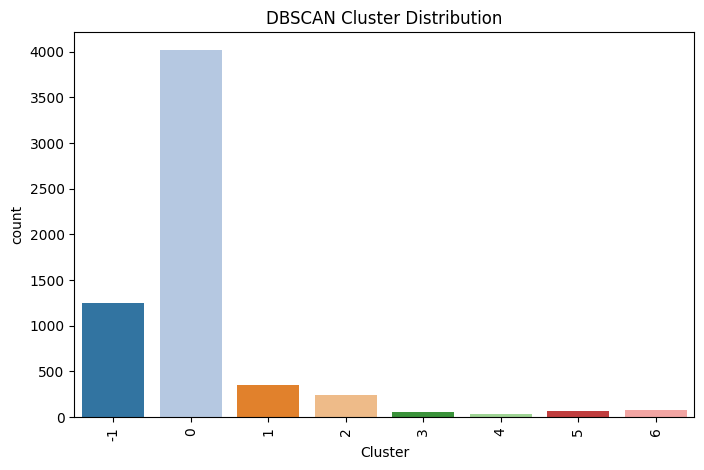

In [8]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=data, palette='tab20')
plt.xticks(rotation=90)  # Rotate x-axis for readability
plt.title("DBSCAN Cluster Distribution")
plt.show()

In [9]:
data[['Cluster', 'Class']].head()

,Cluster,Class
0,0,0
1,0,0
2,1,1
3,0,1
4,0,1


In [10]:
print(f"Cluster Counts: {dict(cluster_counts)}")

Cluster Counts: {0: 4014, 1: 350, -1: 1246, 2: 239, 3: 53, 4: 34, 5: 62, 6: 77}


In [11]:
data['Cluster'] = data['Cluster']

# Display the updated dataset
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age,Sex,Jaundice,Family_ASD,Class,Cluster
0,1,1,0,1,0,0,1,1,0,0,15,0,0,0,0,0
1,0,1,1,1,0,1,1,0,1,0,15,0,0,0,0,0
2,1,1,1,0,1,1,1,1,1,1,15,1,0,1,1,1
3,1,1,1,1,1,1,1,1,0,0,16,1,0,0,1,0
4,1,1,1,1,1,1,1,1,1,1,15,1,0,0,1,0


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Step 7: Data Preparation
# Define features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

# Train-test split (80-20 split for better generalization)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardizing the data for improved model performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Training and Testing data ready for modeling.")

print(f"Training Data Shape: {X_train.shape}")
print(f"Test Data Shape: {X_test.shape}")

Training and Testing data ready for modeling.
Training Data Shape: (4860, 15)
Test Data Shape: (1215, 15)


In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

# Classifiers
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


def preprocess_data(data, target_column='Class', test_size=0.2):
    X = data.drop(target_column, axis=1)
    y = data[target_column]

    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, stratify=y, random_state=42
    )

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

def initialize_models():
    return {
        'Random Forest': RandomForestClassifier(n_estimators=200, random_state=42),
        'LightGBM': LGBMClassifier(n_estimators=200, random_state=42,verbose=-1),
        'Logistic Regression': LogisticRegression(max_iter=500, random_state=42),
        'Decision Tree': DecisionTreeClassifier(random_state=42),
        'SVM': SVC(kernel='rbf', probability=True, random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB()
    }

def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else y_pred

    # Print the classification report
    print(f"\n🔹 Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

def run_all_models(data):
    X_train, X_test, y_train, y_test = preprocess_data(data)
    models = initialize_models()

    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        results[name] = evaluate_model(model, X_test, y_test, name)

    return pd.DataFrame(results).T.sort_values(by='Accuracy', ascending=False)

# ==== MAIN EXECUTION ====
results_df = run_all_models(data)

print("\n Summary: Model Evaluation Results:")
print(results_df)



🔹 Classification Report for Random Forest:

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       854
           1       0.99      0.95      0.97       361

    accuracy                           0.98      1215
   macro avg       0.99      0.97      0.98      1215
weighted avg       0.98      0.98      0.98      1215


🔹 Classification Report for LightGBM:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       854
           1       0.99      1.00      0.99       361

    accuracy                           1.00      1215
   macro avg       1.00      1.00      1.00      1215
weighted avg       1.00      1.00      1.00      1215


🔹 Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.93      0.92      0.93       854
           1       0.82      0.84      0.83       361

    accuracy                           0.90   

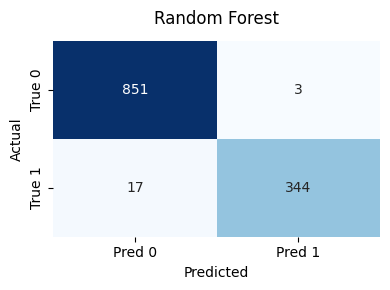

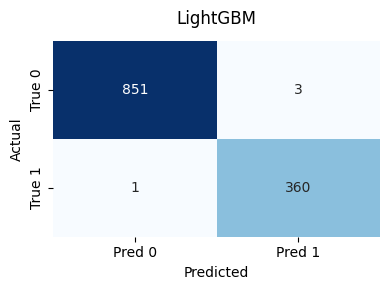

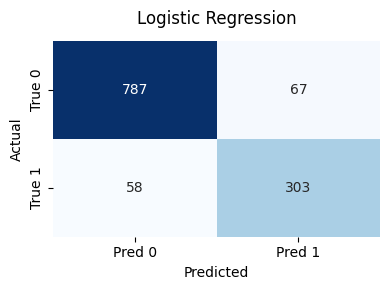

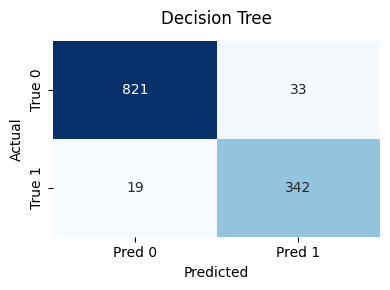

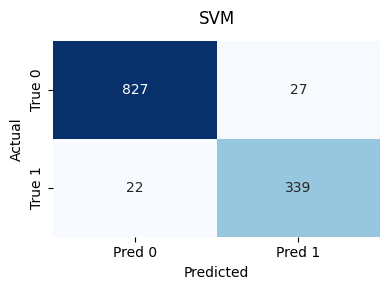

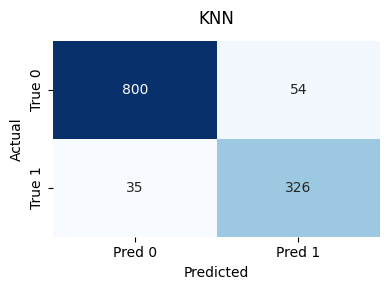

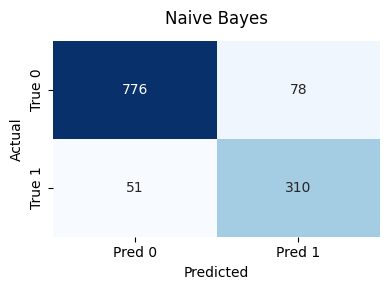

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def show_confusion_matrices(models, X_test, y_test):
    """Displays separate confusion matrix for each model"""
    for name, model in models.items():
        y_pred = model.predict(X_test)
        cm = confusion_matrix(y_test, y_pred)

        plt.figure(figsize=(4, 3))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                    xticklabels=['Pred 0', 'Pred 1'],
                    yticklabels=['True 0', 'True 1'])
        plt.title(name, pad=12)
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()

# Usage:
# 1. First run your existing code to train models
# 2. Then call:
show_confusion_matrices(models, X_test, y_test)

In [28]:
for name, model in models.items():
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(name)
    plt.savefig(f'{name}_confusion_matrix.png')  # Saves to disk
    plt.close()  # Prevents display if running in batch mode

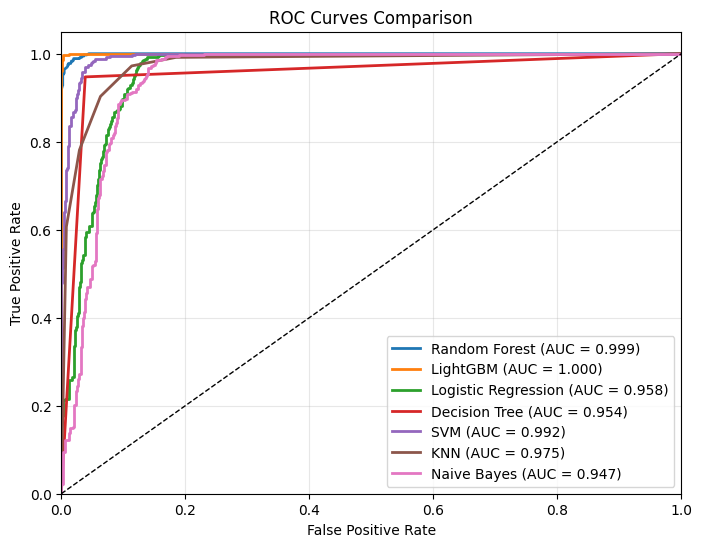

In [29]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

def plot_roc_curves(models, X_test, y_test):
    """Plots individual ROC curves for each model"""
    plt.figure(figsize=(8, 6))

    for name, model in models.items():
        # Get predicted probabilities
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:  # For models without predict_proba (e.g., SVM with kernel)
            y_proba = model.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

        # Calculate ROC curve
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, lw=2,
                label=f'{name} (AUC = {roc_auc:.3f})')

    # Formatting
    plt.plot([0, 1], [0, 1], 'k--', lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves Comparison')
    plt.legend(loc="lower right")
    plt.grid(True, alpha=0.3)
    plt.show()

# Usage:
# After running your models, call:
plot_roc_curves(models, X_test, y_test)

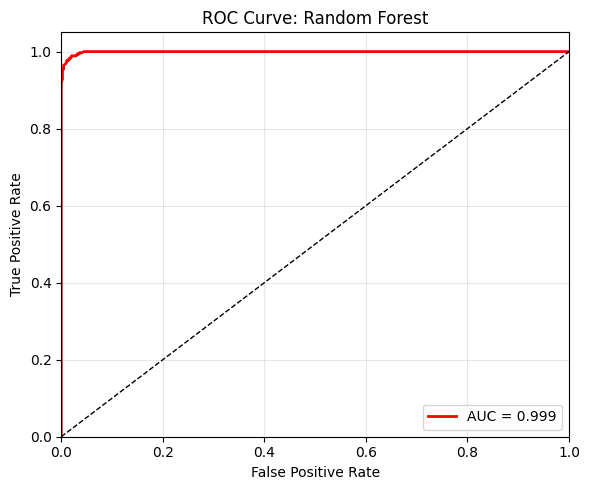

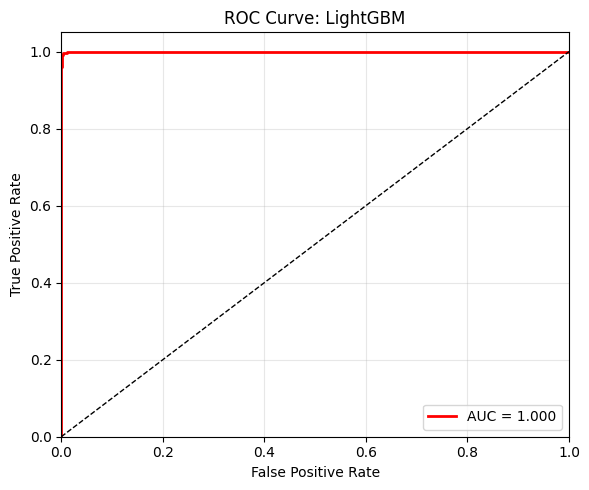

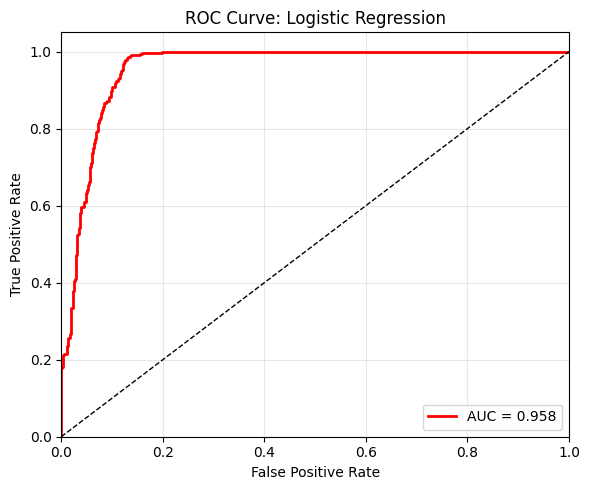

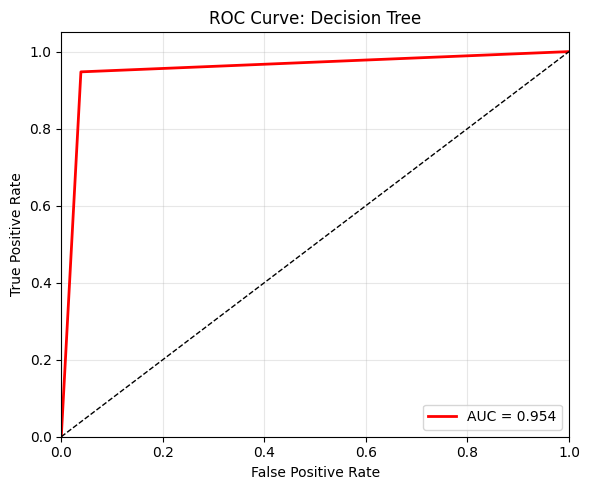

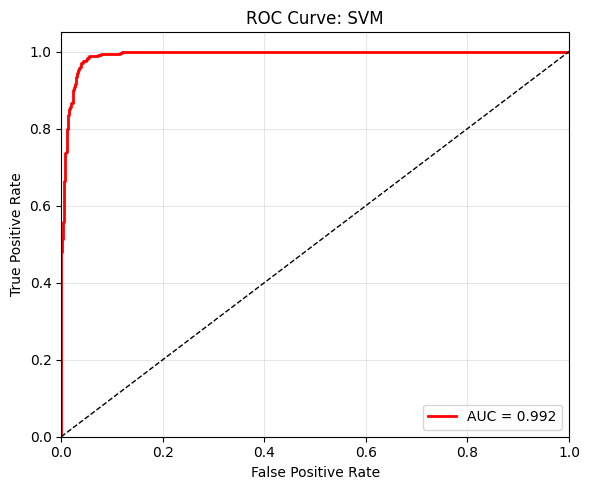

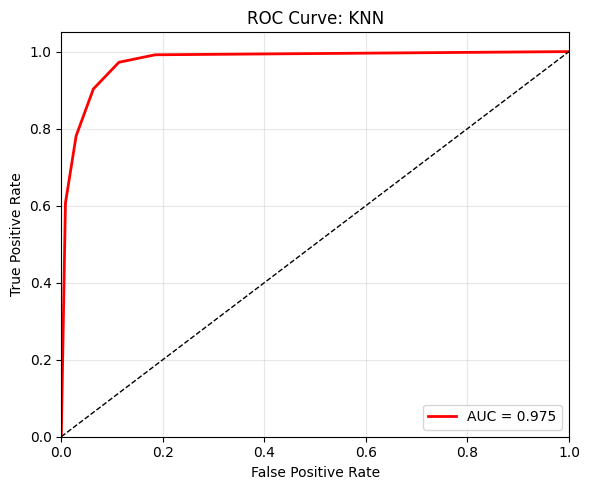

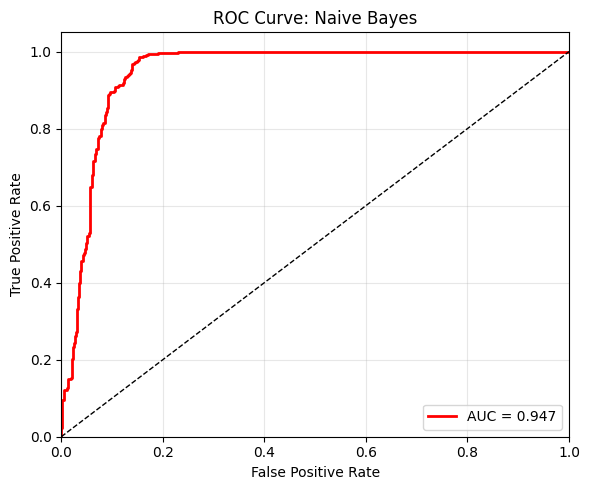

In [39]:
def plot_individual_rocs(models, X_test, y_test):
    """Generates individual ROC plots for each classifier"""
    for name, model in models.items():
        plt.figure(figsize=(6, 5))

        # Get probabilities
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:, 1]
        else:
            y_proba = model.decision_function(X_test)
            y_proba = (y_proba - y_proba.min()) / (y_proba.max() - y_proba.min())

        # Calculate ROC
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)

        # Plot
        plt.plot(fpr, tpr, color='red',
                lw=2, label=f'AUC = {roc_auc:.3f}')
        plt.plot([0, 1], [0, 1], 'k--', lw=1)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve: {name}')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.tight_layout()
        plt.show()

# Usage:
plot_individual_rocs(models, X_test, y_test)

**Accuracy Comparison Graph**

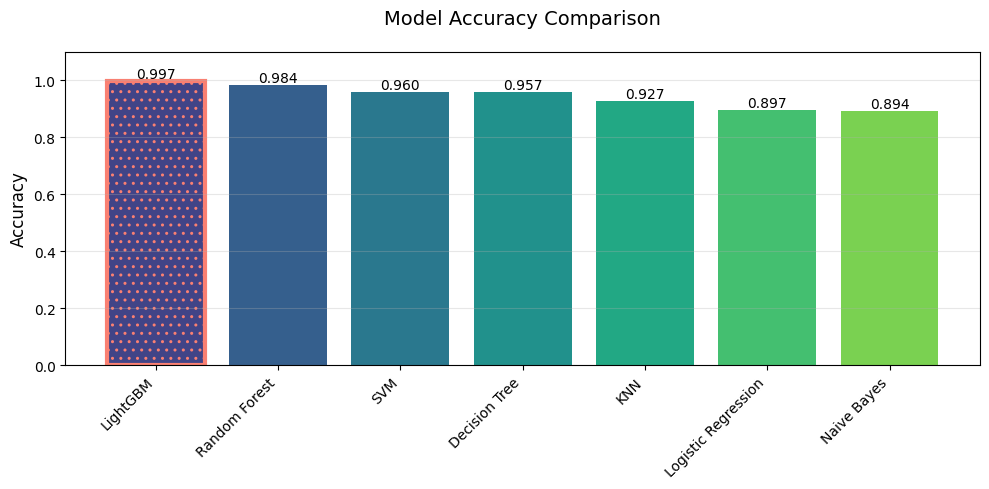

In [43]:
import matplotlib.pyplot as plt
import numpy as np

def compare_accuracy(models, X_test, y_test):
    """Generates bar chart comparing model accuracies"""
    # Calculate accuracies
    accuracies = {name: accuracy_score(y_test, model.predict(X_test))
                 for name, model in models.items()}

    # Sort by accuracy (descending)
    accuracies = dict(sorted(accuracies.items(), key=lambda x: x[1], reverse=True))

    # Plot
    plt.figure(figsize=(10, 5))
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models)))

    bars = plt.bar(accuracies.keys(), accuracies.values(), color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    # Formatting
    plt.ylim(0, 1.1)
    plt.ylabel('Accuracy', fontsize=12)
    plt.title('Model Accuracy Comparison', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Highlight the best model
    best_model = max(accuracies, key=accuracies.get)
    best_index = list(accuracies.keys()).index(best_model)
    bars[best_index].set_edgecolor('salmon')
    bars[best_index].set_linewidth(3)
    bars[best_index].set_hatch('..')

    plt.tight_layout()
    plt.show()

# Usage:
# After training models, run:
compare_accuracy(models, X_test, y_test) # Call the function to calculate accuracies and plot

**Precision Comparision Graph **

Random Forest: Average Precision = 0.959
LightGBM: Average Precision = 0.990
Logistic Regression: Average Precision = 0.735
Decision Tree: Average Precision = 0.880
SVM: Average Precision = 0.888
KNN: Average Precision = 0.804
Naive Bayes: Average Precision = 0.728


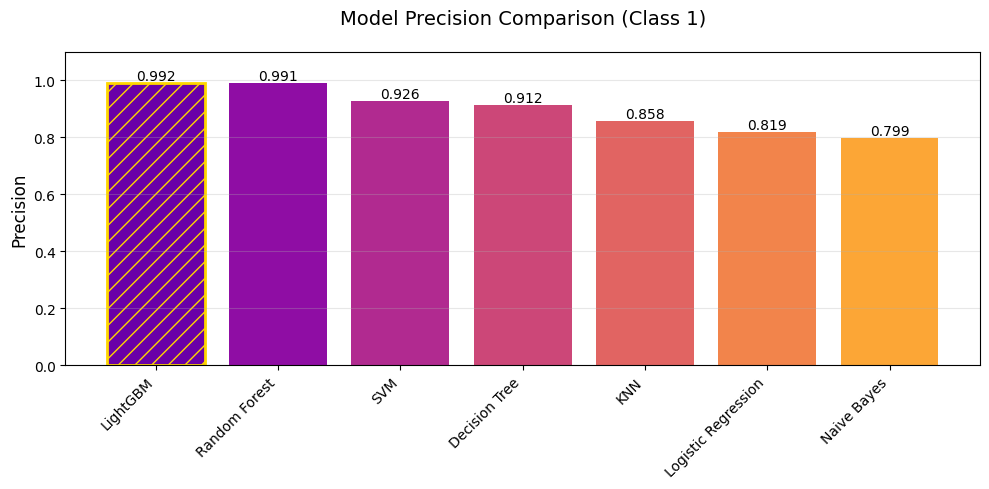

In [45]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_score

def compare_precision(models, X_test, y_test):
    """Generates bar chart comparing model precision scores"""
    # Calculate precision for each model
    precisions = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        precisions[name] = precision_score(y_test, y_pred, zero_division=0)
        avg_precision = average_precision_score(y_test, y_pred)
        print(f"{name}: Average Precision = {avg_precision:.3f}")

    # Sort by precision (descending)
    precisions = dict(sorted(precisions.items(), key=lambda x: x[1], reverse=True))

    # Visualization
    plt.figure(figsize=(10, 5))
    colors = plt.cm.plasma(np.linspace(0.2, 0.8, len(models)))

    bars = plt.bar(precisions.keys(), precisions.values(), color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    # Formatting
    plt.ylim(0, 1.1)
    plt.ylabel('Precision', fontsize=12)
    plt.title('Model Precision Comparison (Class 1)', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Highlight best model
    best_model = max(precisions, key=precisions.get)
    best_index = list(precisions.keys()).index(best_model)
    bars[best_index].set_edgecolor('gold')
    bars[best_index].set_linewidth(2)
    bars[best_index].set_hatch('//')

    plt.tight_layout()
    plt.show()

# Usage:
# After training models, run:
compare_precision(models, X_test, y_test)

**Recall Comparison**

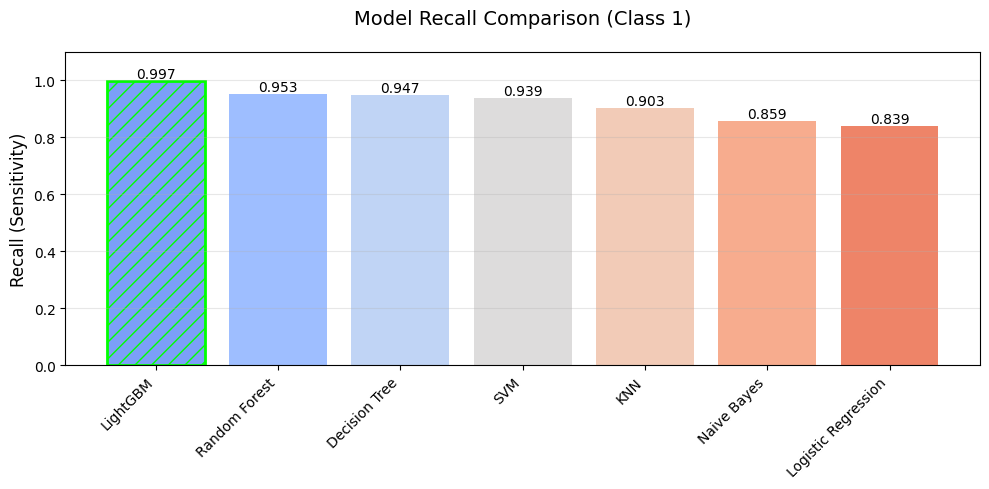

In [49]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import recall_score

def compare_recall(models, X_test, y_test):
    """Generates bar chart comparing model recall scores"""
    # Calculate recall for each model
    recalls = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        recalls[name] = recall_score(y_test, y_pred, zero_division=0)

    # Sort by recall (descending)
    recalls = dict(sorted(recalls.items(), key=lambda x: x[1], reverse=True))
    threshold = 0.9  # Your minimum acceptable recall

    # Visualization
    plt.figure(figsize=(10, 5))
    colors = plt.cm.coolwarm(np.linspace(0.2, 0.8, len(models)))

    bars = plt.bar(recalls.keys(), recalls.values(), color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    # Formatting
    plt.ylim(0, 1.1)
    plt.ylabel('Recall (Sensitivity)', fontsize=12)
    plt.title('Model Recall Comparison (Class 1)', pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Highlight best model
    best_model = max(recalls, key=recalls.get)
    best_index = list(recalls.keys()).index(best_model)
    bars[best_index].set_edgecolor('lime')
    bars[best_index].set_linewidth(2)
    bars[best_index].set_hatch('//')

    plt.tight_layout()
    plt.show()

# Usage:
compare_recall(models, X_test, y_test)

**F1 Score Comparision**

Random Forest: F1 (Class 0) = 0.988, F1 (Class 1) = 0.972
LightGBM: F1 (Class 0) = 0.998, F1 (Class 1) = 0.994
Logistic Regression: F1 (Class 0) = 0.926, F1 (Class 1) = 0.829
Decision Tree: F1 (Class 0) = 0.969, F1 (Class 1) = 0.929
SVM: F1 (Class 0) = 0.971, F1 (Class 1) = 0.933
KNN: F1 (Class 0) = 0.947, F1 (Class 1) = 0.880
Naive Bayes: F1 (Class 0) = 0.923, F1 (Class 1) = 0.828


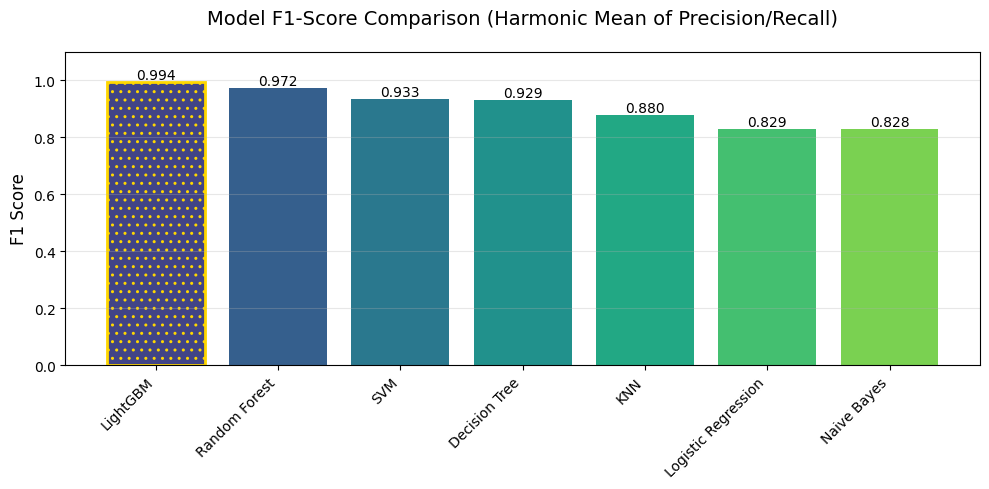

In [48]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import f1_score

def compare_f1(models, X_test, y_test):
    """Generates bar chart comparing model F1 scores"""
    # Calculate F1 for each model
    f1_scores = {}
    for name, model in models.items():
        y_pred = model.predict(X_test)
        f1_scores[name] = f1_score(y_test, y_pred, zero_division=0)
        f1_class0 = f1_score(y_test, y_pred, pos_label=0)
        f1_class1 = f1_score(y_test, y_pred, pos_label=1)
        print(f"{name}: F1 (Class 0) = {f1_class0:.3f}, F1 (Class 1) = {f1_class1:.3f}")

    # Sort by F1 (descending)
    f1_scores = dict(sorted(f1_scores.items(), key=lambda x: x[1], reverse=True))

    # Visualization
    plt.figure(figsize=(10, 5))
    colors = plt.cm.viridis(np.linspace(0.2, 0.8, len(models)))

    bars = plt.bar(f1_scores.keys(), f1_scores.values(), color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    # Formatting
    plt.ylim(0, 1.1)
    plt.ylabel('F1 Score', fontsize=12)
    plt.title('Model F1-Score Comparison (Harmonic Mean of Precision/Recall)',
              pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Highlight best model
    best_model = max(f1_scores, key=f1_scores.get)
    best_index = list(f1_scores.keys()).index(best_model)
    bars[best_index].set_edgecolor('gold')
    bars[best_index].set_linewidth(2)
    bars[best_index].set_hatch('..')

    plt.tight_layout()
    plt.show()

# Usage:
compare_f1(models, X_test, y_test)

**AUC-ROC**

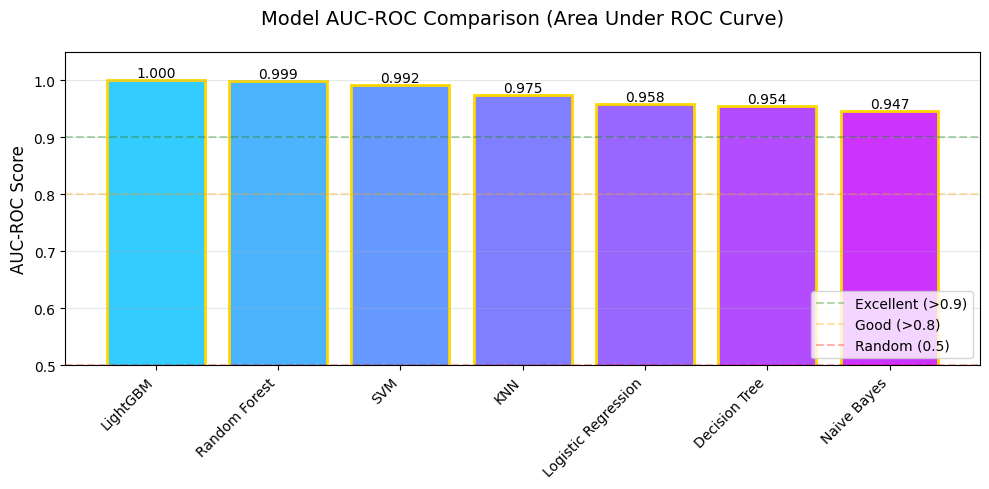

In [50]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score

def compare_auc_roc(models, X_test, y_test):
    """Generates bar chart comparing model AUC-ROC scores"""
    # Calculate AUC-ROC for each model
    auc_scores = {}
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X_test)[:, 1]
        else:  # For SVM-like models
            y_score = model.decision_function(X_test)
        auc_scores[name] = roc_auc_score(y_test, y_score)

    # Sort by AUC (descending)
    auc_scores = dict(sorted(auc_scores.items(), key=lambda x: x[1], reverse=True))

    # Visualization
    plt.figure(figsize=(10, 5))
    colors = plt.cm.cool(np.linspace(0.2, 0.8, len(models)))

    bars = plt.bar(auc_scores.keys(), auc_scores.values(), color=colors)

    # Add value labels
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}',
                ha='center', va='bottom', fontsize=10)

    # Formatting
    plt.ylim(0.5, 1.05)  # AUC ranges from 0.5-1
    plt.ylabel('AUC-ROC Score', fontsize=12)
    plt.title('Model AUC-ROC Comparison (Area Under ROC Curve)',
              pad=20, fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)

    # Highlight models
    for i, (name, score) in enumerate(auc_scores.items()):
        if score > 0.9:
            bars[i].set_edgecolor('gold')
            bars[i].set_linewidth(2)

    # Reference lines
    plt.axhline(y=0.9, color='green', linestyle='--', alpha=0.3, label='Excellent (>0.9)')
    plt.axhline(y=0.8, color='orange', linestyle='--', alpha=0.3, label='Good (>0.8)')
    plt.axhline(y=0.5, color='red', linestyle='--', alpha=0.3, label='Random (0.5)')
    plt.legend(loc='lower right')

    plt.tight_layout()
    plt.show()

# Usage:
compare_auc_roc(models, X_test, y_test)

<Figure size 800x600 with 0 Axes>

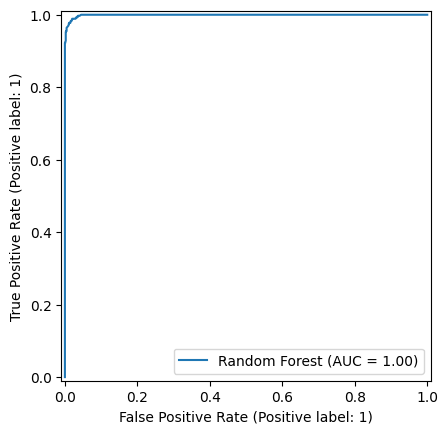

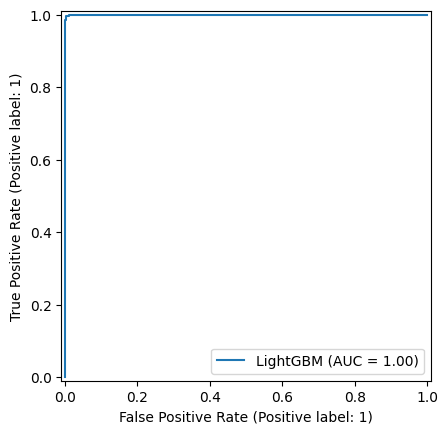

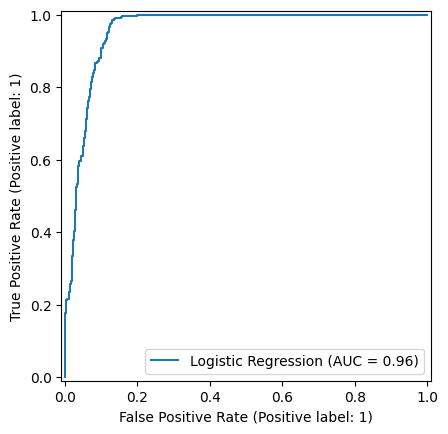

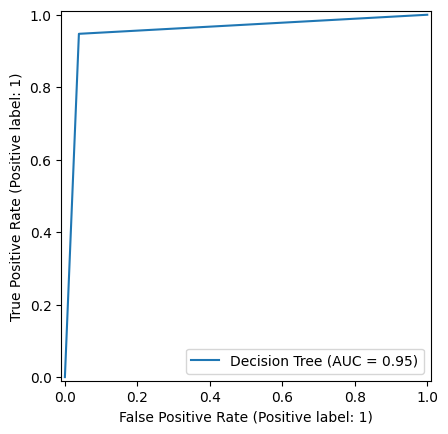

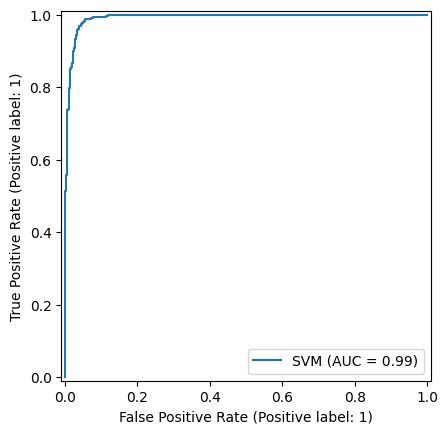

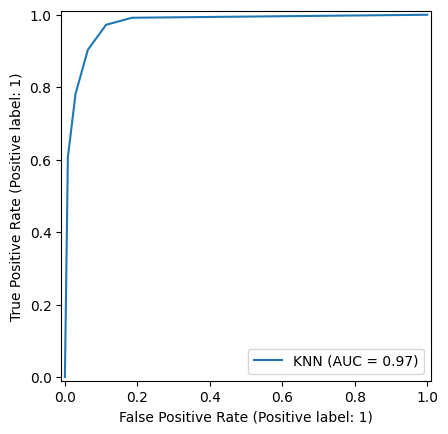

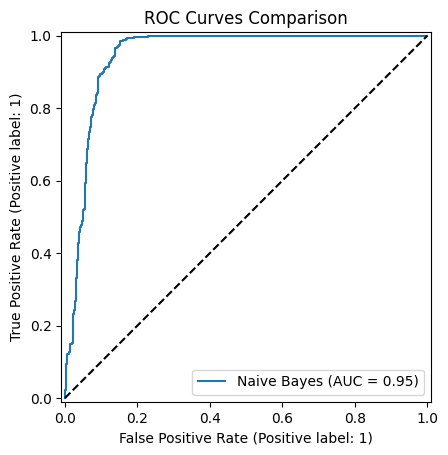

In [51]:
from sklearn.metrics import RocCurveDisplay

plt.figure(figsize=(8, 6))
for name, model in models.items():
    RocCurveDisplay.from_estimator(model, X_test, y_test, name=name)
plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves Comparison')
plt.show()

**Cross-Validation (Gold Standard)**

In [52]:
from sklearn.model_selection import cross_validate

def cross_validate_model(model, X, y, cv=5):
    metrics = {
        'accuracy': 'accuracy',
        'precision': 'precision',
        'recall': 'recall',
        'f1': 'f1',
        'roc_auc': 'roc_auc'
    }
    results = cross_validate(model, X, y, cv=cv, scoring=metrics)

    # Calculate mean ± std for each metric
    return {
        'Accuracy': f"{results['test_accuracy'].mean():.3f} ± {results['test_accuracy'].std():.3f}",
        'Precision': f"{results['test_precision'].mean():.3f} ± {results['test_precision'].std():.3f}",
        'Recall': f"{results['test_recall'].mean():.3f} ± {results['test_recall'].std():.3f}",
        'F1': f"{results['test_f1'].mean():.3f} ± {results['test_f1'].std():.3f}",
        'AUC-ROC': f"{results['test_roc_auc'].mean():.3f} ± {results['test_roc_auc'].std():.3f}"
    }

# Usage:
for name, model in models.items():
    print(f"\n{name} Cross-Validation:")
    print(cross_validate_model(model, X, y))


Random Forest Cross-Validation:
{'Accuracy': '0.959 ± 0.026', 'Precision': '0.929 ± 0.065', 'Recall': '0.938 ± 0.041', 'F1': '0.932 ± 0.041', 'AUC-ROC': '0.993 ± 0.007'}

LightGBM Cross-Validation:
{'Accuracy': '0.967 ± 0.042', 'Precision': '0.932 ± 0.106', 'Recall': '0.979 ± 0.027', 'F1': '0.951 ± 0.058', 'AUC-ROC': '0.998 ± 0.003'}

Logistic Regression Cross-Validation:
{'Accuracy': '0.899 ± 0.075', 'Precision': '0.848 ± 0.151', 'Recall': '0.872 ± 0.072', 'F1': '0.847 ± 0.084', 'AUC-ROC': '0.952 ± 0.071'}

Decision Tree Cross-Validation:
{'Accuracy': '0.915 ± 0.067', 'Precision': '0.835 ± 0.128', 'Recall': '0.934 ± 0.029', 'F1': '0.876 ± 0.080', 'AUC-ROC': '0.921 ± 0.048'}

SVM Cross-Validation:
{'Accuracy': '0.913 ± 0.048', 'Precision': '0.914 ± 0.068', 'Recall': '0.782 ± 0.152', 'F1': '0.835 ± 0.104', 'AUC-ROC': '0.974 ± 0.029'}

KNN Cross-Validation:
{'Accuracy': '0.864 ± 0.123', 'Precision': '0.783 ± 0.179', 'Recall': '0.890 ± 0.047', 'F1': '0.818 ± 0.116', 'AUC-ROC': '0.922 ± 0

**Train-Validation-Test Split**

In [53]:
X_train, X_val_test, y_train, y_val_test = train_test_split(X, y, test_size=0.4)
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5)

model.fit(X_train, y_train)
val_score = model.score(X_val, y_val)
test_score = model.score(X_test, y_test)

**Stratified Sampling (For Imbalanced Data)**

In [55]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=5)
for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]  # Use .iloc for row selection
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]  # Use .iloc for row selection
    # Train and evaluate

**Bootstrapping (For Confidence Intervals)**

In [56]:
from sklearn.utils import resample

n_iterations = 1000
scores = []
for _ in range(n_iterations):
    X_sample, y_sample = resample(X_test, y_test)
    scores.append(model.score(X_sample, y_sample))

print(f"95% CI: [{np.percentile(scores, 2.5):.3f}, {np.percentile(scores, 97.5):.3f}]")

95% CI: [0.725, 0.774]


**ALL VALIDATON **

🔎 Running 5-Fold Cross-Validation...

⭐ Evaluating Random Forest

⭐ Evaluating LightGBM

⭐ Evaluating Logistic Regression

⭐ Evaluating Decision Tree

⭐ Evaluating SVM

⭐ Evaluating KNN

⭐ Evaluating Naive Bayes

⭐ Evaluating Baseline

📊 Final Results:
                            Accuracy        Precision           Recall  \
LightGBM             0.9908 ± 0.0033  0.9792 ± 0.0089  0.9900 ± 0.0028   
Random Forest        0.9798 ± 0.0020  0.9828 ± 0.0056  0.9484 ± 0.0091   
Decision Tree        0.9631 ± 0.0041  0.9365 ± 0.0094  0.9396 ± 0.0067   
SVM                  0.9608 ± 0.0044  0.8984 ± 0.0107  0.9789 ± 0.0048   
KNN                  0.9235 ± 0.0047  0.8527 ± 0.0101  0.8975 ± 0.0109   
Logistic Regression  0.9198 ± 0.0099  0.8102 ± 0.0188  0.9540 ± 0.0081   
Naive Bayes          0.9073 ± 0.0056  0.8247 ± 0.0159  0.8742 ± 0.0079   
Baseline             0.5699 ± 0.0122  0.2767 ± 0.0206  0.2777 ± 0.0203   

                                  F1          AUC-ROC  
LightGBM             0.9

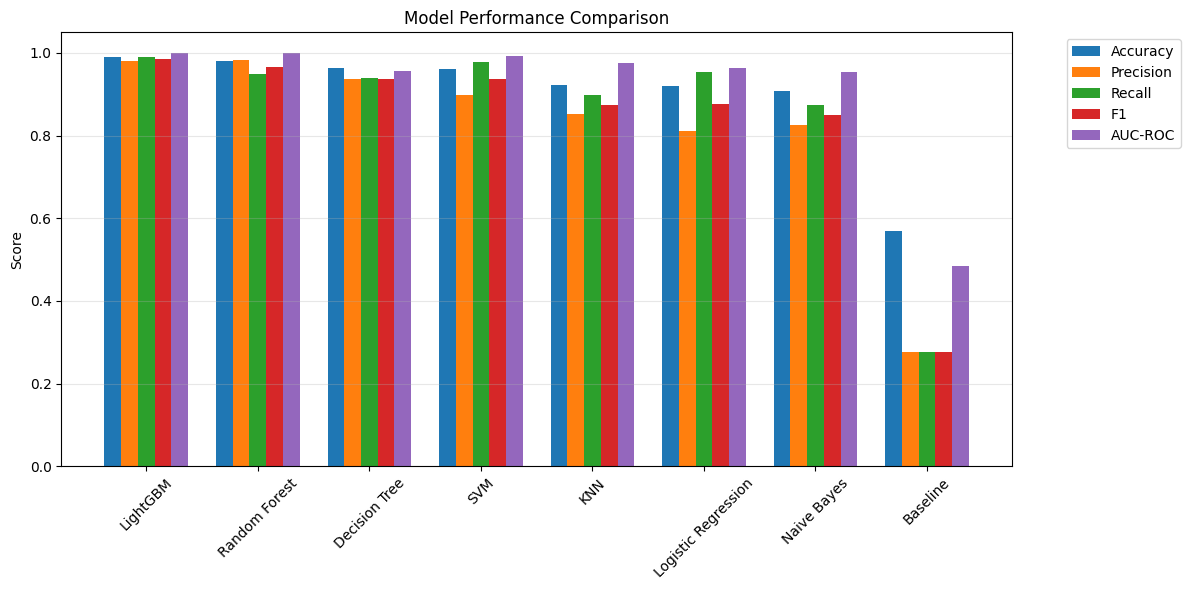

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                            f1_score, roc_auc_score, confusion_matrix)
from sklearn.dummy import DummyClassifier
from joblib import Parallel, delayed

# Models
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# ========== Preprocessing ==========
def prepare_data(data, target_column='Class'):
    """Separates features and target without scaling"""
    X = data.drop(target_column, axis=1)
    y = data[target_column]
    return X, y

# ========== Initialize Models ==========
def initialize_models():
    """Returns models with balanced class weights where applicable"""
    return {
        'Random Forest': RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42),
        'LightGBM': LGBMClassifier(n_estimators=200, class_weight='balanced', random_state=42, verbosity=-1),
        'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
        'Decision Tree': DecisionTreeClassifier(class_weight='balanced', random_state=42),
        'SVM': SVC(kernel='rbf', probability=True, class_weight='balanced', random_state=42),
        'KNN': KNeighborsClassifier(n_neighbors=5),
        'Naive Bayes': GaussianNB(),
        'Baseline': DummyClassifier(strategy='stratified', random_state=42)
    }

# ========== Evaluation Metrics ==========
def calculate_metrics(model, X_test, y_test):
    """Calculates all metrics for a given model"""
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else y_pred

    return {
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred, zero_division=0),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred),
        'AUC-ROC': roc_auc_score(y_test, y_proba)
    }

# ========== Cross-Validation ==========
def cross_validate_model(model, X, y, cv_folds=5):
    """Performs stratified k-fold CV with parallel processing"""
    skf = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=42)
    scaler = StandardScaler()

    def evaluate_fold(train_idx, test_idx):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Scale within fold
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        model.fit(X_train, y_train)
        return calculate_metrics(model, X_test, y_test)

    # Parallel execution
    results = Parallel(n_jobs=-1)(
        delayed(evaluate_fold)(train_idx, test_idx)
        for train_idx, test_idx in skf.split(X, y)
    )

    # Aggregate results
    metrics = {key: [] for key in results[0].keys()}
    for result in results:
        for key, value in result.items():
            metrics[key].append(value)

    return {
        metric: f"{np.mean(values):.4f} ± {np.std(values):.4f}"
        for metric, values in metrics.items()
    }

# ========== Visualization ==========
def plot_metrics_comparison(results_df):
    """Plots metric comparison bars"""
    metrics = ['Accuracy', 'Precision', 'Recall', 'F1', 'AUC-ROC']
    plt.figure(figsize=(12, 6))

    for i, metric in enumerate(metrics):
        values = results_df[metric].str.extract(r'([\d.]+)')[0].astype(float)
        plt.bar(np.arange(len(results_df)) + i*0.15, values, width=0.15, label=metric)

    plt.xticks(np.arange(len(results_df)) + 0.3, results_df.index, rotation=45)
    plt.ylabel('Score')
    plt.title('Model Performance Comparison')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()

# ========== Main Execution ==========
def run_comparison(data):
    """Main workflow"""
    X, y = prepare_data(data)
    models = initialize_models()

    print("🔎 Running 5-Fold Cross-Validation...")
    results = {}
    for name, model in models.items():
        print(f"\n⭐ Evaluating {name}")
        results[name] = cross_validate_model(model, X, y)

    results_df = pd.DataFrame(results).T
    results_df = results_df.sort_values(by='Accuracy', ascending=False)

    print("\n📊 Final Results:")
    print(results_df)

    print("\n📈 Visual Comparison:")
    plot_metrics_comparison(results_df)

    return results_df

# ===== Run It =====
results_df = run_comparison(data)